In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import core.config as config
from core.model_loader import load_pretrained_VAE, load_pretrained_GLOW
from core.data_loader import TRAIN_loader, TEST_loader
from core.custom_loss import KL_div, VAE_loss
from core.fisher_utils_VAE import Calculate_fisher_VAE, Calculate_score_VAE
from core.fisher_utils_VAE import AUTO_VAE_CIFAR, AUTO_VAE_FMNIST
from core.fisher_utils_GLOW import Calculate_fisher_GLOW, Calculate_score_GLOW
from core.fisher_utils_GLOW import AUTO_GLOW_CIFAR, AUTO_GLOW_FMNIST
from core.visualize import plot_hist, AUROC

# Define Global Variables & Initialize

In [148]:
# GRADs : Gradients from calculating Fisher score (w.r.t. train-dist)
GRADs = {'VAE': {'cifar10': 0, 'fmnist': 0},
         'GLOW': {'cifar10': 0, 'fmnist': 0}}
         
# NORMalize_FACtors : Normalizing Factor (w.r.t. train-dist)
NORM_FACs = {'VAE': {'cifar10': 0, 'fmnist': 0},
             'GLOW': {'cifar10': 0, 'fmnist': 0}}
             
# Gradients : Gradients from calculating Fisher score (w.r.t. target-dist)
Gradients = {'VAE': {'cifar10': {}, 'fmnist': {}},
             'GLOW': {'cifar10': {}, 'fmnist': {}}}

## Note

dictionary 형태로 결괏값을 저장합니다.   
key의 형태는 model - in-dist - out-dist 입니다.  
(ex)  
GRADs['VAE']['cifar10'] : VAE모델, cifar10훈련 시 나온 Grad  
NORM_FACs['VAE']['cifar10'] : VAE모델, cifar10훈련 시 나온 Normalize_Factor  
Gradients['VAE']['cifar10']['svhn'] : VAE모델, cifar10 (In), svhn (Out) 시 score  

# VAE-CIFAR10

In [166]:
train_dist = 'cifar10'
opt = config.VAE_cifar10
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [netG.main[-1].weight, netE.conv1.weight]

In [167]:
a, b, c, d, e, f, g = AUTO_VAE_CIFAR(netE, netG, dicts)
GRADs['VAE']['cifar10'] = a
NORM_FACs['VAE']['cifar10'] = b
Gradients['VAE']['cifar10']['cifar10'] = c
Gradients['VAE']['cifar10']['svhn'] = d
Gradients['VAE']['cifar10']['celeba'] = e
Gradients['VAE']['cifar10']['lsun'] = f
Gradients['VAE']['cifar10']['noise'] = g

Files already downloaded and verified


Calculate Fisher VAE:  20%|██████████▏                                        | 10001/50000 [01:17<05:09, 129.13step/s]


Files already downloaded and verified


Calculate Score VAE:  50%|██████████████████████████▌                          | 5001/10000 [00:42<00:41, 119.06step/s]


Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score VAE:  50%|██████████████████████████▌                          | 5001/10000 [00:40<00:40, 123.19step/s]


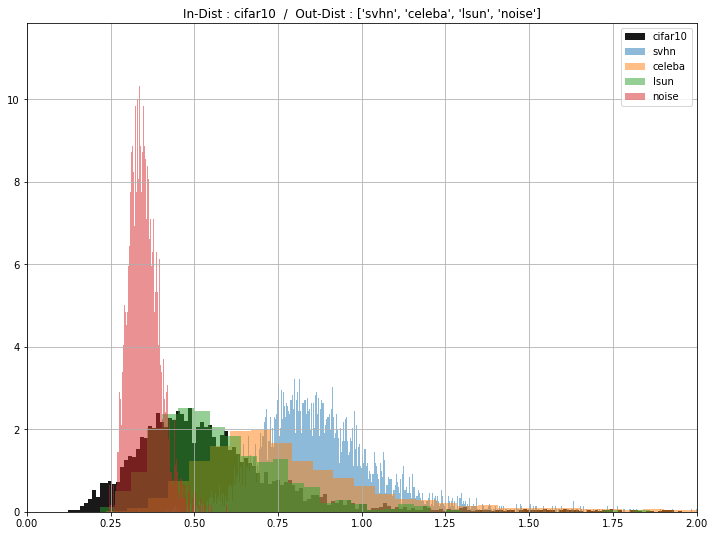

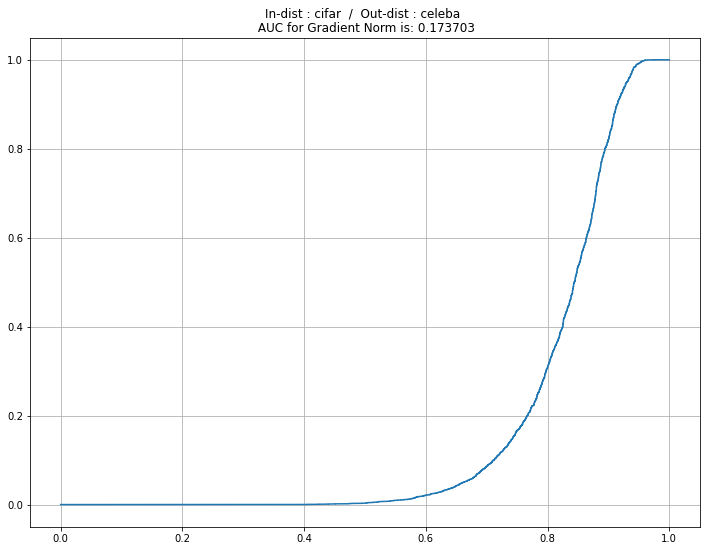

In [172]:
# Histogram
args = [
    Gradients['VAE']['cifar10']['cifar10'],
    Gradients['VAE']['cifar10']['svhn'],
    Gradients['VAE']['cifar10']['celeba'],
    Gradients['VAE']['cifar10']['lsun'],
    Gradients['VAE']['cifar10']['noise'],
]
bins = [1000, 1000, 300, 300, 300]
labels = ['cifar10', 'svhn', 'celeba', 'lsun', 'noise']
xlim = [0, 2]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)


# AUROC curve
args = [
    Gradients['VAE']['cifar10']['cifar10'],
    Gradients['VAE']['cifar10']['noise'],
]
labels = ['cifar', 'celeba']
AUROC(*args, labels=labels)

# VAE-FMNIST

In [173]:
train_dist = 'fmnist'
opt = config.VAE_fmnist
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [netG.main[-1].weight, netE.conv1.weight]

In [174]:
a, b, c, d, e = AUTO_VAE_FMNIST(netE, netG, dicts)
GRADs['VAE']['fmnist'] = a
NORM_FACs['VAE']['fmnist'] = b
Gradients['VAE']['fmnist']['fmnist'] = c
Gradients['VAE']['fmnist']['mnist'] = d
Gradients['VAE']['fmnist']['noise'] = e

Calculate Score VAE:  50%|██████████████████████████▌                          | 5001/10000 [00:25<00:25, 194.85step/s]


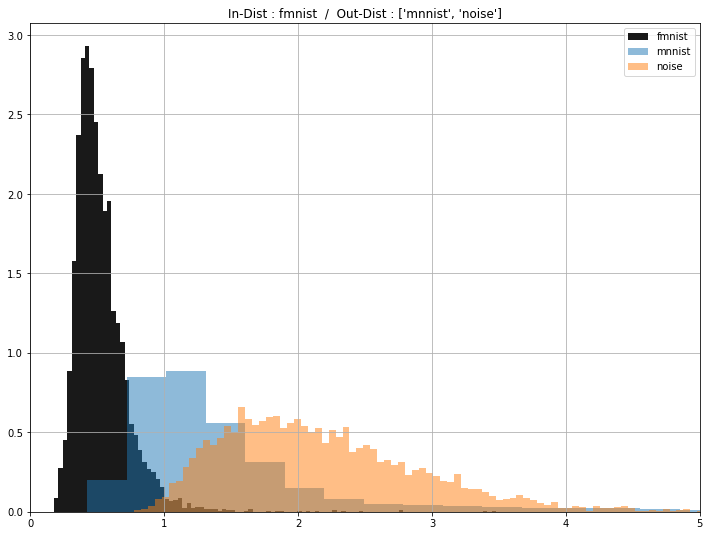

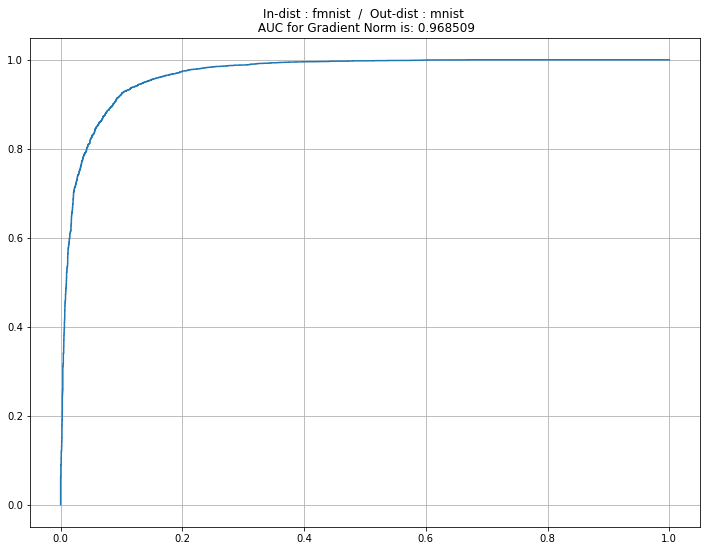

In [175]:
# Histogram
args = [
    Gradients['VAE']['fmnist']['fmnist'],
    Gradients['VAE']['fmnist']['mnist'],
    Gradients['VAE']['fmnist']['noise'],
]
bins = [100, 100, 100]
labels = ['fmnist', 'mnnist', 'noise']
xlim = [0, 5]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)


# AUROC curve
args = [
    Gradients['VAE']['fmnist']['fmnist'],
    Gradients['VAE']['fmnist']['mnist'],
]
labels = ['fmnist', 'mnist']
AUROC(*args, labels=labels)

# GLOW-CIFAR10

In [160]:
train_dist = 'cifar10'
opt = config.GLOW_cifar10
model = load_pretrained_GLOW(option=train_dist)

dicts = [model.flow.layers[-1]]

In [161]:
a, b, c, d, e, f, g = AUTO_GLOW_CIFAR(model, dicts)
GRADs['GLOW']['cifar10'] = a
NORM_FACs['GLOW']['cifar10'] = b
Gradients['GLOW']['cifar10']['cifar10'] = c
Gradients['GLOW']['cifar10']['svhn'] = d
Gradients['GLOW']['cifar10']['celeba'] = e
Gradients['GLOW']['cifar10']['lsun'] = f
Gradients['GLOW']['cifar10']['noise'] = g

Files already downloaded and verified


Calculate Fisher GLOW:   2%|█                                                 | 1001/50000 [04:28<3:38:56,  3.73step/s]


Files already downloaded and verified


Calculate Score GLOW:   4%|██▏                                                   | 401/10000 [01:48<43:22,  3.69step/s]


Using downloaded and verified file: ../data/test_32x32.mat


Calculate Score GLOW:   4%|██▏                                                   | 401/10000 [01:46<42:33,  3.76step/s]


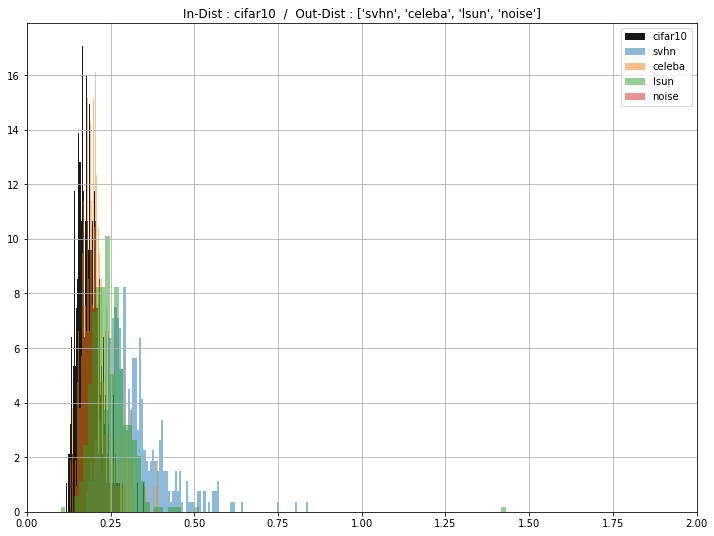

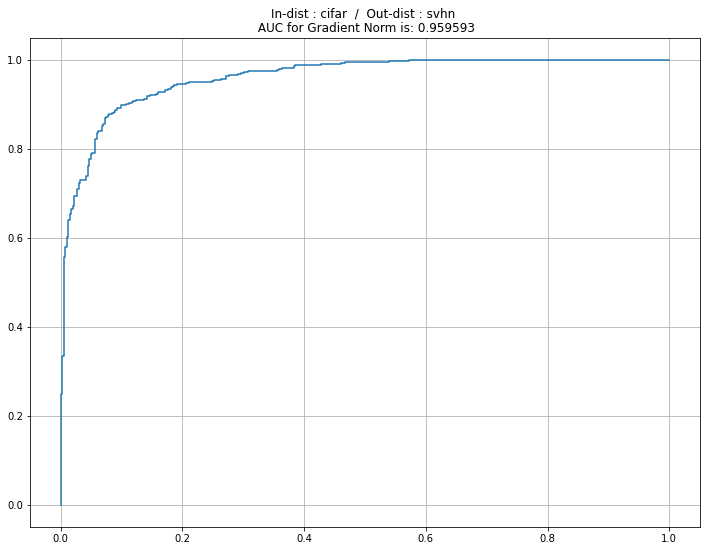

In [162]:
# Histogram
args = [
    Gradients['GLOW']['cifar10']['cifar10'],
    Gradients['GLOW']['cifar10']['svhn'],
    Gradients['GLOW']['cifar10']['celeba'],
    Gradients['GLOW']['cifar10']['lsun'],
    Gradients['GLOW']['cifar10']['noise'],
]
bins = [100, 100, 100, 100, 100]
labels = ['cifar10', 'svhn', 'celeba', 'lsun', 'noise']
xlim = [0, 2]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)


# AUROC curve
args = [
    Gradients['GLOW']['cifar10']['cifar10'],
    Gradients['GLOW']['cifar10']['svhn'],
]
labels = ['cifar', 'svhn']
AUROC(*args, labels=labels)

# GLOW-FMNIST (미완성)

In [ ]:
train_dist = 'fmnist'
opt = config.GLOW_fmnist # 에러날 거
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [netG.main[-1].weight, netE.conv1.weight]

In [ ]:
a, b, c, d, e = AUTO_GLOW_FNNIST(netE, netG, dicts)
GRADs['GLOW']['fmnist'] = a
NORM_FACs['GLOW']['fmnist'] = b
Gradients['GLOW']['fmnist']['fmnist'] = c
Gradients['GLOW']['fmnist']['mnist'] = d
Gradients['GLOW']['fmnist']['noise'] = e

In [ ]:
# Histogram
args = [
    Gradients['GLOW']['fmnist']['fmnist'],
    Gradients['GLOW']['fmnist']['mnist'],
    Gradients['GLOW']['fmnist']['noise'],
]
bins = [100, 100, 100]
labels = ['fmnist', 'mnnist', 'noise']
xlim = [0, 5]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)


# AUROC curve
args = [
    Gradients['GLOW']['fmnist']['fmnist'],
    Gradients['GLOW']['fmnist']['mnist'],
]
labels = ['fmnist', 'mnist']
AUROC(*args, labels=labels)